# Projet Mental Health & Technology Usage

## Importation des modules

In [3]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

## Chargement des données
Les données sont dans un tableau au format CSV

In [25]:
donnees = pd.read_csv("mental_health_and_technology_usage_2024.csv",sep=",")

In [113]:
donnees.head(5)

,User_ID,Age,Gender,Technology_Usage_Hours,Social_Media_Usage_Hours,Gaming_Hours,Screen_Time_Hours,Mental_Health_Status,Stress_Level,Sleep_Hours,Physical_Activity_Hours,Support_Systems_Access,Work_Environment_Impact,Online_Support_Usage,Group_Age
0,USER-00001,23,Female,6.57,6.00,0.68,12.36,Good,Low,8.01,6.71,No,Negative,Yes,18-29 ans
1,USER-00002,21,Male,3.01,2.57,3.74,7.61,Poor,High,7.28,5.88,Yes,Positive,No,18-29 ans
2,USER-00003,51,Male,3.04,6.14,1.26,3.16,Fair,High,8.04,9.81,No,Negative,No,50-59 ans
3,USER-00004,25,Female,3.84,4.48,2.59,13.08,Excellent,Medium,5.62,5.28,Yes,Negative,Yes,18-29 ans
4,USER-00005,53,Male,1.20,0.56,0.29,12.63,Good,Low,5.55,4.00,No,Positive,Yes,50-59 ans


In [29]:
donnees.describe()

,Age,Technology_Usage_Hours,Social_Media_Usage_Hours,Gaming_Hours,Screen_Time_Hours,Sleep_Hours,Physical_Activity_Hours
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,41.518600,6.474341,3.972321,2.515598,7.975765,6.500724,5.003860
std,13.920217,3.169022,2.313707,1.446748,4.042608,1.450933,2.905044
min,18.000000,1.000000,0.000000,0.000000,1.000000,4.000000,0.000000
25%,29.000000,3.760000,1.980000,1.260000,4.520000,5.260000,2.490000
50%,42.000000,6.425000,3.950000,2.520000,7.900000,6.500000,4.990000
75%,54.000000,9.212500,5.990000,3.790000,11.500000,7.760000,7.540000
max,65.000000,12.000000,8.000000,5.000000,15.000000,9.000000,10.000000


On remarque qu'il n'y a pas de données manquantes.

## Problématique 
### Dans quelles mesures l'utilisation des nouvelles technologies pertube-t-elle le sommeil et favorise-t-elle le stress ? 

On va commencer par **observer nos données**, en répondant aux questions suivantes :

    1. Quels sont les personnes les plus touchés par la perturbation du sommeil et par le stress ? 
    2. Y'a t'il une corrélation entre le temps passé sur les écrans et le temps de sommeil ? 
    3. L'activité physique a-telle un impact sur la santé mentale ? 

### Quels sont les personnes les plus touchés par la perturbation du sommeil et par le stress ? 

On va les regrouper par tranches d'age pour faciliter notre analyse

In [35]:
donnees['Group_Age'] = pd.cut(donnees['Age'], 
                               bins=[17, 30, 40, 50, 60, 67],
                               labels=['18-29 ans', '30-39 ans', '40-49 ans', '50-59 ans', '60 ans et +'])

In [37]:
nb_personnes = donnees.groupby('Group_Age', observed=False)['User_ID'].count()
nb_personnes

Group_Age
18-29 ans      2723
30-39 ans      2068
40-49 ans      2079
50-59 ans      2053
60 ans et +    1077
Name: User_ID, dtype: int64

In [39]:
stress = donnees.groupby('Stress_Level')['User_ID'].count()
stress

Stress_Level
High      3330
Low       3332
Medium    3338
Name: User_ID, dtype: int64

In [41]:
nombre_stresses_par_age = donnees[donnees['Stress_Level'] == 'High'].groupby('Group_Age', observed=False).size()
nombre_stresses_par_age

Group_Age
18-29 ans      924
30-39 ans      666
40-49 ans      714
50-59 ans      667
60 ans et +    359
dtype: int64

In [43]:
personnes_stress = pd.DataFrame({"Nombre de personnes stréssées": nombre_stresses_par_age, "Nombre de personnes": nb_personnes})
personnes_stress

,Nombre de personnes stréssées,Nombre de personnes
Group_Age,,
18-29 ans,924,2723
30-39 ans,666,2068
40-49 ans,714,2079
50-59 ans,667,2053
60 ans et +,359,1077


Représentation graphique 

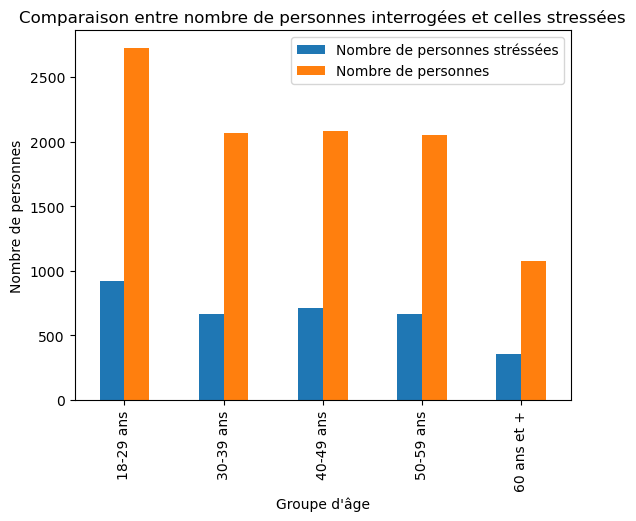

In [46]:
personnes_stress.plot(kind='bar')
plt.title("Comparaison entre nombre de personnes interrogées et celles stressées")
plt.xlabel("Groupe d'âge")
plt.ylabel("Nombre de personnes")
plt.show()

In [48]:
pourcentage_stress = pd.DataFrame({"Pourcentage de stress": round(nombre_stresses_par_age * 100/ nb_personnes,2)})
pourcentage_stress

,Pourcentage de stress
Group_Age,
18-29 ans,33.93
30-39 ans,32.21
40-49 ans,34.34
50-59 ans,32.49
60 ans et +,33.33


In [50]:
summary = pd.DataFrame({"Nombre de personnes stréssées": nombre_stresses_par_age, "Nombre de personnes": nb_personnes, "Pourcentage de stress": round(nombre_stresses_par_age * 100/ nb_personnes,2)})
summary

,Nombre de personnes stréssées,Nombre de personnes,Pourcentage de stress
Group_Age,,,
18-29 ans,924,2723,33.93
30-39 ans,666,2068,32.21
40-49 ans,714,2079,34.34
50-59 ans,667,2053,32.49
60 ans et +,359,1077,33.33


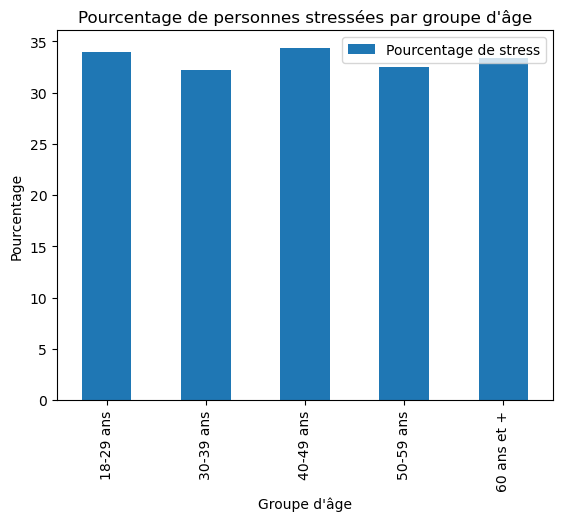

In [54]:
pourcentage_stress.plot(kind='bar')
plt.title("Pourcentage de personnes stressées par groupe d'âge")
plt.xlabel("Groupe d'âge")
plt.ylabel("Pourcentage")
plt.show()

Les personnes les plus touchés sont les 40-49 ans avec 34.34% suivie par les 18-29 ans avec 33.93%

Maintenant, observons quelles sont les personnes touchés par la perturbation du sommeil 

Pour cela on va comparer les moyennes des heures de sommeil pour chaque groupe d'âge.

In [65]:
moyenne_sommeil_par_age = donnees.groupby('Group_Age', observed=False)['Sleep_Hours'].mean()
moyenne_sommeil_par_age

Group_Age
18-29 ans      6.514513
30-39 ans      6.486958
40-49 ans      6.505835
50-59 ans      6.484593
60 ans et +    6.513175
Name: Sleep_Hours, dtype: float64

Représentation graphique 

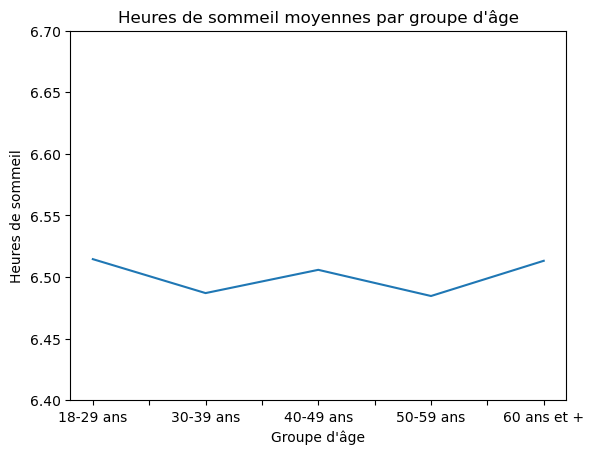

In [67]:
moyenne_sommeil_par_age.plot(kind='line')
plt.title("Heures de sommeil moyennes par groupe d'âge")
plt.xlabel("Groupe d'âge")
plt.ylabel("Heures de sommeil")
plt.ylim(ymin=6.4, ymax=6.7)
plt.show()

On peut voir qu'il n'y a pas de différence significative entre les différentes tranches d'âge, puisque les moyennes sont très proches les unes des autres.

Les personnes qui dorment le moins sont les 18-29 ans et les 60 ans et plus avec 6.51 heures de sommeil en moyenne.

**Conclusions**

    * Les personnes le plus touchés par le stress sont les 40-49 ans et les 18-29 ans.
    * Les personnes qui dorment le moins sont les 18-29 ans et les 60 ans et plus.
    * Les résultats obtenus sont plutot serrées.


### Y'a t'il une corrélation entre le temps passé sur les écrans et le temps de sommeil ? 

On va regarder s'il y a un corrélation entre le temps passé sur les écrans et le temps de sommeil. 

In [97]:
screen_hours = donnees[donnees['Screen_Time_Hours'] > 7]
screen_hours

,User_ID,Age,Gender,Technology_Usage_Hours,Social_Media_Usage_Hours,Gaming_Hours,Screen_Time_Hours,Mental_Health_Status,Stress_Level,Sleep_Hours,Physical_Activity_Hours,Support_Systems_Access,Work_Environment_Impact,Online_Support_Usage,Group_Age
0,USER-00001,23,Female,6.57,6.00,0.68,12.36,Good,Low,8.01,6.71,No,Negative,Yes,18-29 ans
1,USER-00002,21,Male,3.01,2.57,3.74,7.61,Poor,High,7.28,5.88,Yes,Positive,No,18-29 ans
3,USER-00004,25,Female,3.84,4.48,2.59,13.08,Excellent,Medium,5.62,5.28,Yes,Negative,Yes,18-29 ans
4,USER-00005,53,Male,1.20,0.56,0.29,12.63,Good,Low,5.55,4.00,No,Positive,Yes,50-59 ans
6,USER-00007,63,Female,3.38,2.55,3.79,9.78,Excellent,Medium,8.61,1.34,Yes,Neutral,No,60 ans et +
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,USER-09995,51,Female,10.71,1.89,3.35,8.03,Fair,Medium,7.77,6.87,No,Neutral,No,50-59 ans
9995,USER-09996,42,Male,7.05,0.41,0.53,13.90,Good,Medium,7.37,5.02,Yes,Neutral,No,40-49 ans
9997,USER-09998,23,Male,4.38,3.98,0.52,7.81,Poor,High,7.59,2.99,No,Positive,No,18-29 ans
9998,USER-09999,38,Male,4.44,1.48,3.28,13.95,Poor,Medium,7.26,2.24,Yes,Neutral,Yes,30-39 ans


On peut voir qu'avec plus de 7h d'écrans par jour, les heures de sommeils sont variables.

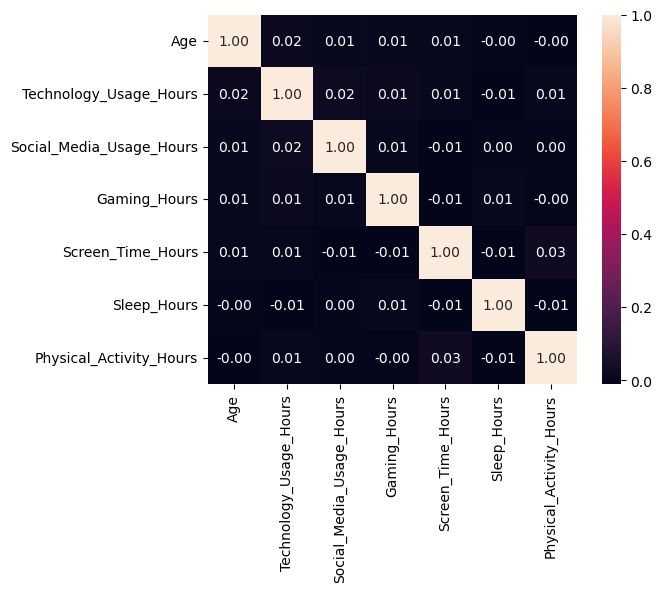

In [79]:
import seaborn as sns
sns.heatmap(donnees.corr(numeric_only=True), fmt='0.2f', annot=True, square=True)
plt.show()

On peut voit qu'il y a une corrélation très faible et négative entre ces deux variables. 
Cela signifie qu'il existe une tendance légèrement inverse entre le temps passé sur les écrans et la durée du sommeil mais cette relation est extrêmement faible et ne peut pas être considérée comme significative.

**Conclusion**

Il n'y a pas de corrélation significative entre le temps passé sur les écrans et le temps de sommeil.

### L'activité physique a-t-elle un impact sur la santé mentale ? 

On va considérer quelqu'un de pas sportif s'il fait moins de 2h de sport, peu sportif entre 2 et 5h, et sportif à partir de 5h de sport.

On va comparer la santé mentale des personnes qui font du sport et celles qui n'en font pas. 


In [120]:
donnees['Sportif'] = pd.cut(donnees['Physical_Activity_Hours'], 
                               bins=[0,2, 5, 11],
                               labels=['non sportif', 'peu sportif', 'sportif'])

<Axes: xlabel='Sportif', ylabel='Mental_Health_Status'>

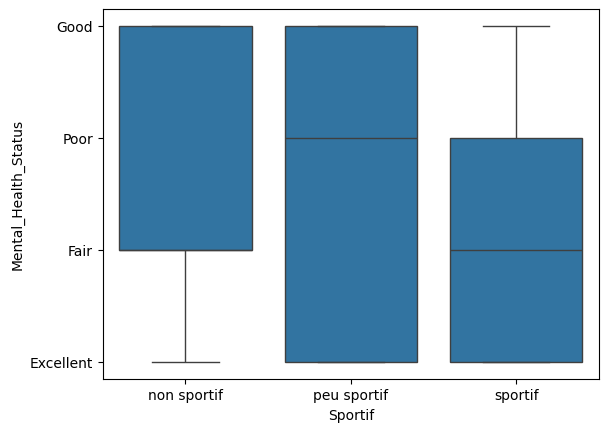

In [298]:
sns.boxplot(x='Sportif', y='Mental_Health_Status', data=donnees)

A travers le graphique, on peut voir que les personnes sportives ont une santé mentale qui varie entre Mauvaise et Excellente.
Les personnes non sportives ont une santé mentale qui varie entre Bonne et Passable. 
Les personnes non sportives ont tous les types de santé mentale.

In [179]:
mental_sportif = donnees.groupby(['Mental_Health_Status', 'Sportif'], observed=False)['User_ID'].count()
mental_sportif

Mental_Health_Status  Sportif    
Excellent             non sportif     483
                      peu sportif     761
                      sportif        1272
Fair                  non sportif     522
                      peu sportif     729
                      sportif        1236
Good                  non sportif     516
                      peu sportif     756
                      sportif        1236
Poor                  non sportif     478
                      peu sportif     768
                      sportif        1236
Name: User_ID, dtype: int64

In [201]:
sportif = donnees.groupby('Sportif', observed=False)['User_ID'].count()
sportif

Sportif
non sportif    1999
peu sportif    3014
sportif        4980
Name: User_ID, dtype: int64

In [205]:
summary= pd.DataFrame({"Santé mentale": mental_sportif})
summary

Santé mentale
Mental_Health_Status Sportif                   
Excellent            non sportif            483
                     peu sportif            761
                     sportif               1272
Fair                 non sportif            522
                     peu sportif            729
                     sportif               1236
Good                 non sportif            516
                     peu sportif            756
                     sportif               1236
Poor                 non sportif            478
                     peu sportif            768
                     sportif               1236

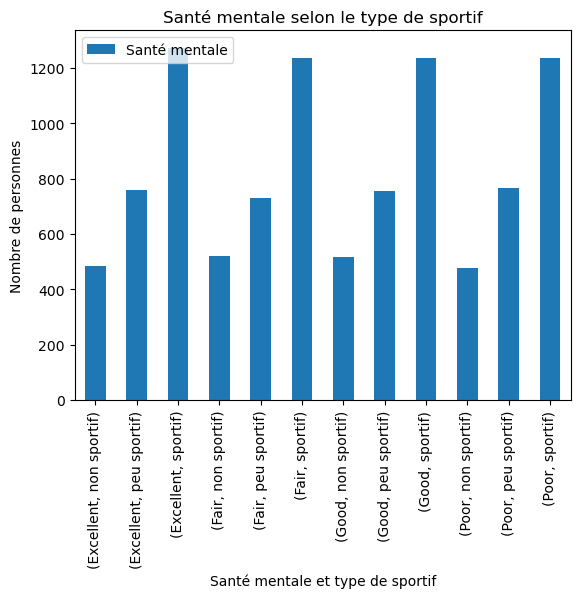

In [175]:
summary.plot(kind='bar')
plt.title("Santé mentale selon le type de sportif")
plt.xlabel("Santé mentale et type de sportif")
plt.ylabel("Nombre de personnes")
plt.show()

In [207]:
summary_plus= pd.DataFrame({"Santé mentale": mental_sportif,
                      '%': round(mental_sportif/sportif*100,2) })
summary_plus

Santé mentale      %
Mental_Health_Status Sportif                          
Excellent            non sportif            483  24.16
                     peu sportif            761  25.25
                     sportif               1272  25.54
Fair                 non sportif            522  26.11
                     peu sportif            729  24.19
                     sportif               1236  24.82
Good                 non sportif            516  25.81
                     peu sportif            756  25.08
                     sportif               1236  24.82
Poor                 non sportif            478  23.91
                     peu sportif            768  25.48
                     sportif               1236  24.82

On remarque que les personnes qui font du sport et celle qui n'en font pas ou peu on plutôt les mêmes état de santé. 
On peut voir que les personnes qui font du sport ont plus une excellente santé mentale  à 25,54%.
Les personnes qui font peu de sport ont plus une mauvaise santé mentale à 25,48%.
Les personnes qui ne font pas de sport ont plus une santé mentale passable à 26,11%.

**Conclusion**

L'activité physique ne modifie pas significativement la santé mentale chez les personnes.
Cette analyse ne permet pas d'établir un lien de causalité direct entre l'activité physique et la santé mentale.

### Hypothèse 1 : Plus le temps passé sur les réseaux sociaux est élevé, plus le niveau de stress est important.


In [240]:
donnees['Addict'] = pd.cut(donnees['Screen_Time_Hours'], 
                               bins=[0,5, 10, 16],
                               labels=['non', 'peu ', 'beaucoup'])

In [242]:
crosstab = pd.crosstab(donnees['Addict'], donnees['Stress_Level'])
crosstab

Stress_Level,High,Low,Medium
Addict,,,
non,956,930,964
peu,1222,1180,1226
beaucoup,1152,1222,1148


In [244]:
crosstab_pct = crosstab.div(crosstab.sum(axis=1), axis=0)
crosstab_pct

Stress_Level,High,Low,Medium
Addict,,,
non,0.335439,0.326316,0.338246
peu,0.336825,0.325248,0.337927
beaucoup,0.327087,0.346962,0.325951


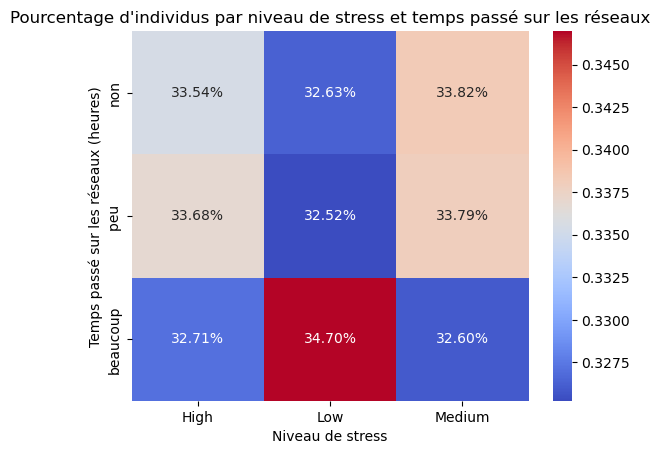

In [251]:
sns.heatmap(crosstab_pct, annot=True, fmt='.2%', cmap='coolwarm')
plt.xlabel("Niveau de stress")
plt.ylabel("Temps passé sur les réseaux (heures)")
plt.title("Pourcentage d'individus par niveau de stress et temps passé sur les réseaux")
plt.show()

On peut constater que ceux qui sont très peu sur leur téléphone ont un stress plutot moyen et haut. 
Les personnes qui sont plus sur leur téléphone ont un stress moyen et un stress haut. 
Les personnes beaucoup sur leur téléphone sont peu stressés. 

Le stress n'est pas plus élevé que l'on soit beaucoup ou non sur son téléphone.

### Hypothèse 2 : Moins une personne dort, plus elle est susceptible de rapporter un mauvais état de santé mentale.


In [258]:
donnees['Dormeur'] = pd.cut(donnees['Sleep_Hours'], 
                               bins=[0,4, 8, 10],
                               labels=['non dormeur', 'dormeur ', 'gros dormeur'])

In [266]:
donnees.head(5)

,User_ID,Age,Gender,Technology_Usage_Hours,Social_Media_Usage_Hours,Gaming_Hours,Screen_Time_Hours,Mental_Health_Status,Stress_Level,Sleep_Hours,Physical_Activity_Hours,Support_Systems_Access,Work_Environment_Impact,Online_Support_Usage,Group_Age,Sportif,Addict,Dormeur
0,USER-00001,23,Female,6.57,6.00,0.68,12.36,Good,Low,8.01,6.71,No,Negative,Yes,18-29 ans,sportif,beaucoup,gros dormeur
1,USER-00002,21,Male,3.01,2.57,3.74,7.61,Poor,High,7.28,5.88,Yes,Positive,No,18-29 ans,sportif,peu,dormeur
2,USER-00003,51,Male,3.04,6.14,1.26,3.16,Fair,High,8.04,9.81,No,Negative,No,50-59 ans,sportif,non,gros dormeur
3,USER-00004,25,Female,3.84,4.48,2.59,13.08,Excellent,Medium,5.62,5.28,Yes,Negative,Yes,18-29 ans,sportif,beaucoup,dormeur
4,USER-00005,53,Male,1.20,0.56,0.29,12.63,Good,Low,5.55,4.00,No,Positive,Yes,50-59 ans,peu sportif,beaucoup,dormeur


In [260]:
crosstab = pd.crosstab(donnees['Dormeur'], donnees['Mental_Health_Status'])
crosstab

Mental_Health_Status,Excellent,Fair,Good,Poor
Dormeur,,,,
non dormeur,3,1,1,4
dormeur,2002,2002,2012,1958
gros dormeur,513,487,495,522


In [262]:
crosstab_pct = crosstab.div(crosstab.sum(axis=1), axis=0)
crosstab_pct

Mental_Health_Status,Excellent,Fair,Good,Poor
Dormeur,,,,
non dormeur,0.333333,0.111111,0.111111,0.444444
dormeur,0.251066,0.251066,0.252320,0.245548
gros dormeur,0.254338,0.241448,0.245414,0.258800


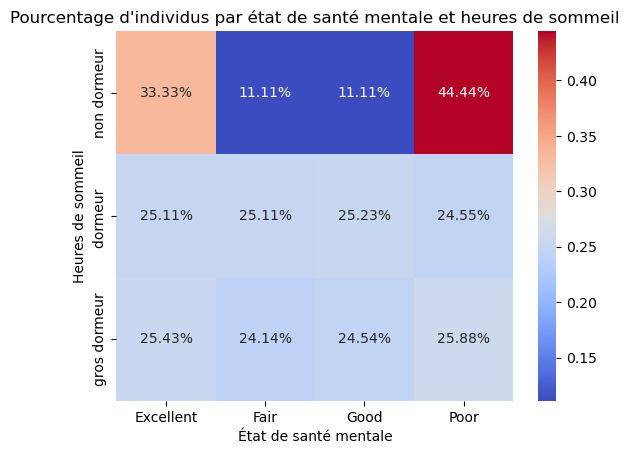

In [264]:
sns.heatmap(crosstab_pct, annot=True, fmt='.2%', cmap='coolwarm')
plt.xlabel("État de santé mentale")
plt.ylabel("Heures de sommeil")
plt.title("Pourcentage d'individus par état de santé mentale et heures de sommeil")
plt.show()

On peut constater que les personnes qui ont moins de 4 heures de sommeil ont plutôt une mauvaise santé mentale à 44,44%.
Les personnes qui ont entre 4 et 7 heures de sommeil sont de santés mentales variables. 
Les personnes qui ont plus de 7 heures de sommeil sont de santés mentales également variables.
On peut aussi voir que les personnes qui ont moins de 4 heures de sommeils sont aussi ceux qui ont une excellente santé mentale avec 33,33%. 

## Conclusion

Nos analyses révèlent que les tranches d'âge les plus touchées par l'anxiété sont les 18-29 ans et les 40-49 ans. Bien que les 18-29 ans soient ceux qui dorment le moins, aucune corrélation significative n'a été établie entre le temps de sommeil, le temps passé sur les écrans, l'activité physique ou le niveau de stress et la santé mentale dans notre échantillon. Ces résultats suggèrent que d'autres facteurs, non étudiés ici, pourraient jouer un rôle plus important dans la santé mentale.


Les jeunes adultes (18-29 ans) semblent particulièrement vulnérables, tant en termes de troubles du sommeil que d'anxiété. Cette tranche d'âge, fortement investie dans les nouvelles technologies, pourrait être plus sensible à leurs effets néfastes.
L'absence de corrélation significative souligne l'importance d'autres facteurs, non mesurés dans notre étude, qui pourraient influencer le sommeil et la santé mentale. Ces facteurs peuvent être d'ordre biologique, psychologique ou social.

L'utilisation des nouvelles technologies n'est pas un facteur isolé. Elle s'inscrit dans un contexte plus large, où interviennent des facteurs tels que le rythme de vie, les relations sociales, les événements de vie, etc. Ces facteurs peuvent moduler les effets des technologies sur le sommeil et le stress.